# Time Series Forecasting

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv('all_airlines_all_airports.csv')

In [7]:
df.head()

,Date,ASM_Domestic,ASM_International,Flights_Domestic,Flights_International,Passengers_Domestic,Passengers_International,RPM_Domestic,RPM_International
0,2002-10-01,57725785,43289662,815489,92565,48054917,9578435,39181901,31535229
1,2002-11-01,54732773,40791272,766775,91342,44850246,9016535,36462419,28497161
2,2002-12-01,56993203,43261782,782175,96881,49684353,10038794,41534214,31761398
3,2003-01-01,56459559,42858438,785651,98053,43032450,9726436,36358651,31073669
4,2003-02-01,50293226,37223024,690750,85965,41166780,8283372,34247719,25641421


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      174 non-null    object
 1   ASM_Domestic              174 non-null    int64 
 2   ASM_International         174 non-null    int64 
 3   Flights_Domestic          174 non-null    int64 
 4   Flights_International     174 non-null    int64 
 5   Passengers_Domestic       174 non-null    int64 
 6   Passengers_International  174 non-null    int64 
 7   RPM_Domestic              174 non-null    int64 
 8   RPM_International         174 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 12.4+ KB


In [9]:
df.describe()

,ASM_Domestic,ASM_International,Flights_Domestic,Flights_International,Passengers_Domestic,Passengers_International,RPM_Domestic,RPM_International
count,1.740000e+02,1.740000e+02,174.000000,174.000000,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02
mean,5.934979e+07,5.522680e+07,746737.459770,110988.643678,5.415329e+07,1.356835e+07,4.781211e+07,4.391930e+07
std,4.300903e+06,9.840444e+06,70998.239177,11124.388670,5.308818e+06,2.587707e+06,5.545424e+06,9.360987e+06
min,4.800594e+07,3.722302e+07,570076.000000,85965.000000,4.116678e+07,8.283372e+06,3.424772e+07,2.492886e+07
25%,5.640924e+07,4.875751e+07,694986.000000,103315.750000,5.024728e+07,1.176969e+07,4.393475e+07,3.766125e+07
50%,5.966098e+07,5.345515e+07,740968.500000,110569.000000,5.413580e+07,1.321384e+07,4.734903e+07,4.267256e+07
75%,6.254960e+07,6.067220e+07,804790.250000,117756.250000,5.819323e+07,1.528553e+07,5.206172e+07,4.959666e+07
max,7.157587e+07,8.335816e+07,891350.000000,141554.000000,6.612997e+07,2.142620e+07,6.239184e+07,7.157168e+07


In [35]:
df_dom=df[['Date','Passengers_Domestic']]

In [36]:
df_dom.head()

,Date,Passengers_Domestic
0,2002-10-01,48054917
1,2002-11-01,44850246
2,2002-12-01,49684353
3,2003-01-01,43032450
4,2003-02-01,41166780


In [15]:
df_int=df[['Date','Passengers_International']]

In [16]:
df_int.head()

,Date,Passengers_International
0,2002-10-01,9578435
1,2002-11-01,9016535
2,2002-12-01,10038794
3,2003-01-01,9726436
4,2003-02-01,8283372


In [37]:
df_dom['Date']=pd.to_datetime(df_dom['Date'])

<ipython-input-37-ea4f342276ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dom['Date']=pd.to_datetime(df_dom['Date'])


In [38]:
df_dom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 174 non-null    datetime64[ns]
 1   Passengers_Domestic  174 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [39]:
df_dom.columns=['Date','Passengers']

In [41]:
df_dom.set_index('Date',inplace=True)

In [42]:
df_dom.head()

,Passengers
Date,
2002-10-01,48054917
2002-11-01,44850246
2002-12-01,49684353
2003-01-01,43032450
2003-02-01,41166780


In [44]:
import seaborn as sns

<AxesSubplot:xlabel='Passengers', ylabel='Count'>

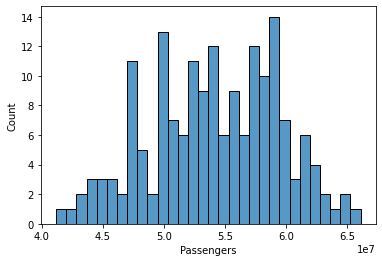

In [47]:
sns.histplot(df_dom['Passengers'],bins=30)

Text(0, 0.5, 'Passengers')

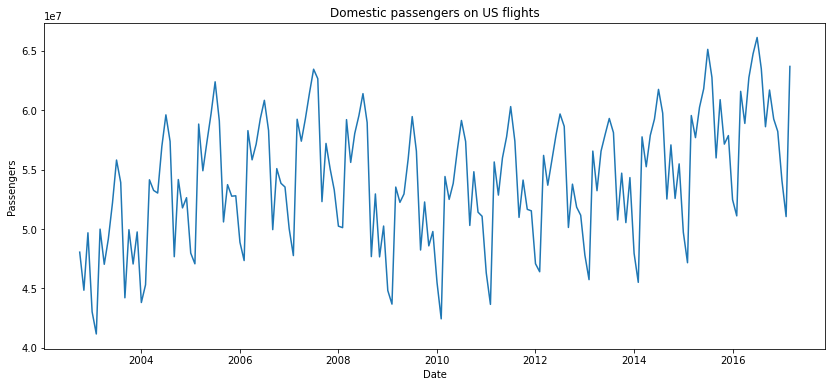

In [66]:
plt.figure(figsize=(14,6))
plt.plot(df_dom)
plt.title('Domestic passengers on US flights')
plt.xlabel('Date')
plt.ylabel('Passengers')

Check for stationarity

1. Rolling Means and Standard Deviation

In [67]:
df_dom_rol_mean=df_dom.rolling(12).mean()
df_dom_rol_std=df_dom.rolling(12).std()

In [71]:
df_dom_rol_mean.dropna(inplace=True)
df_dom_rol_std.dropna(inplace=True)

In [73]:
 np.count_nonzero(df_dom_rol_mean.isnull())  

0

Text(0, 0.5, 'Passengers')

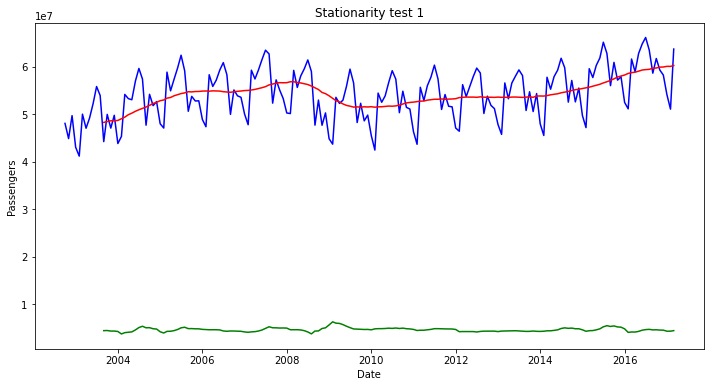

In [84]:
plt.figure(figsize=(12,6))
plt.plot(df_dom,color='blue',label='Original')
plt.plot(df_dom_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

2. ADF test

In [75]:
from statsmodels.tsa.stattools import adfuller

In [76]:
adf_result=adfuller(df_dom)

In [83]:
print("p-value: ",adf_result[1])
print("Test statistic: ",adf_result[0])
print("Critical values: ",adf_result[4])

p-value:  0.23818542308568952
Test statistic:  -2.115859494108299
Critical values:  {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


Perform Transformations

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [86]:
df_dom_decompose=seasonal_decompose(df_dom)

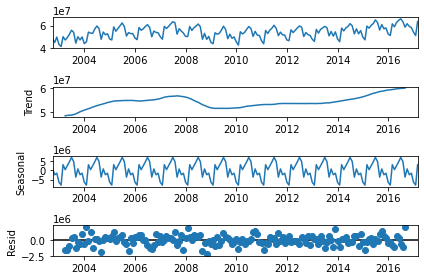

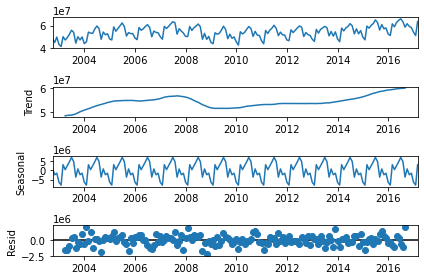

In [104]:
df_dom_decompose.plot()

In [105]:
df_dom.head()

,Passengers
Date,
2002-10-01,48054917
2002-11-01,44850246
2002-12-01,49684353
2003-01-01,43032450
2003-02-01,41166780


1. Shift by 1

In [109]:
df_dom_shift=df_dom-df_dom.shift()

In [110]:
df_dom_shift.head()

,Passengers
Date,
2002-10-01,NaN
2002-11-01,-3204671.0
2002-12-01,4834107.0
2003-01-01,-6651903.0
2003-02-01,-1865670.0


In [111]:
np.count_nonzero(df_dom_shift.isnull())  

1

In [113]:
df_dom_shift.dropna(inplace=True)

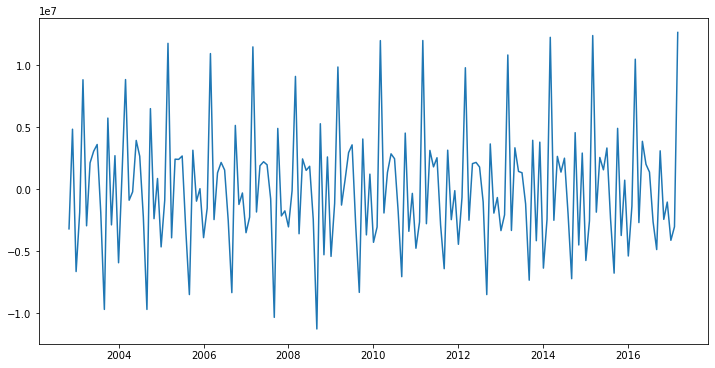

In [117]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_shift)

In [118]:
df_dom_shift_rol_mean=df_dom_shift.rolling(12).mean()
df_dom_shift_rol_std=df_dom_shift.rolling(12).std()

In [120]:
df_dom_shift_rol_mean.dropna(inplace=True)
df_dom_shift_rol_std.dropna(inplace=True)

Text(0, 0.5, 'Passengers')

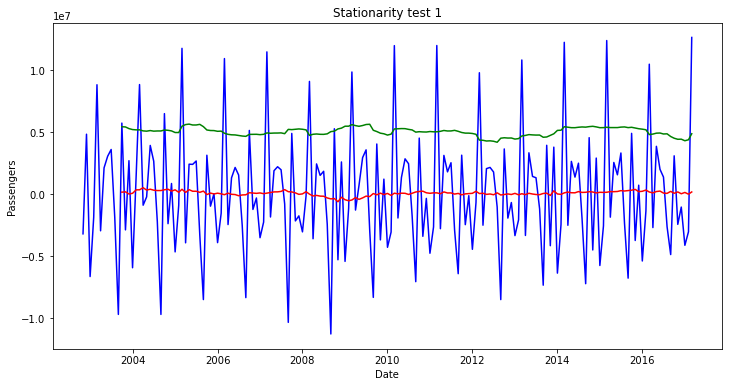

In [121]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_shift,color='blue',label='Original')
plt.plot(df_dom_shift_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_shift_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [122]:
adf_shift_result=adfuller(df_dom_shift)

In [123]:
print("p-value: ",adf_shift_result[1])
print("Test statistic: ",adf_shift_result[0])
print("Critical values: ",adf_shift_result[4])

p-value:  0.18968304723405754
Test statistic:  -2.2468495247357154
Critical values:  {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


2. Seasonal shift

In [124]:
df_dom_seas_shift=df_dom-df_dom.shift(12)

In [125]:
df_dom_seas_shift.head(15)

,Passengers
Date,
2002-10-01,NaN
2002-11-01,NaN
2002-12-01,NaN
2003-01-01,NaN
2003-02-01,NaN
2003-03-01,NaN
2003-04-01,NaN
2003-05-01,NaN
2003-06-01,NaN


In [126]:
df_dom_seas_shift.dropna(inplace=True)

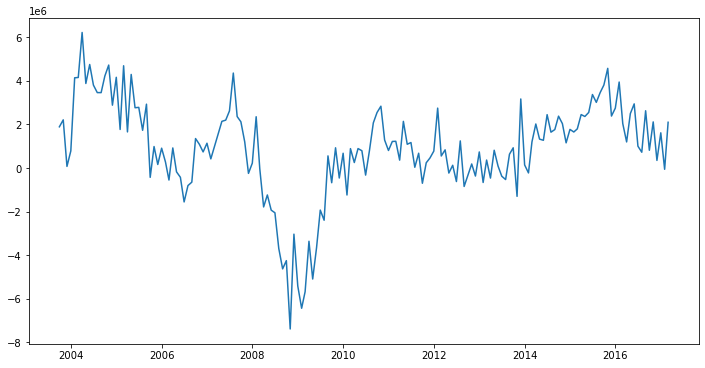

In [127]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_seas_shift)

In [128]:
df_dom_seas_shift_rol_mean=df_dom_seas_shift.rolling(12).mean()
df_dom_seas_shift_rol_std=df_dom_seas_shift.rolling(12).std()

In [129]:
df_dom_seas_shift_rol_mean.dropna(inplace=True)
df_dom_seas_shift_rol_std.dropna(inplace=True)

Text(0, 0.5, 'Passengers')

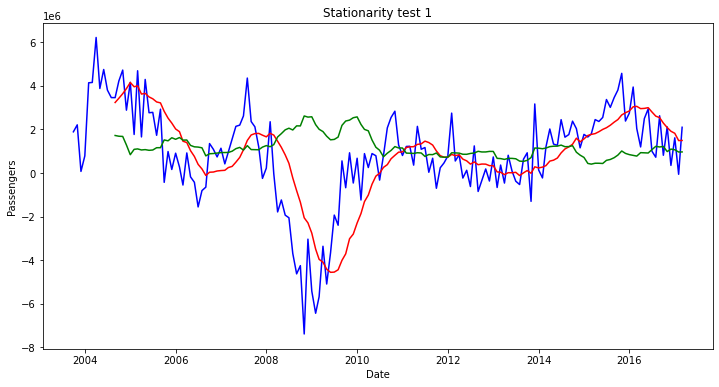

In [130]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_seas_shift,color='blue',label='Original')
plt.plot(df_dom_seas_shift_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_seas_shift_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [131]:
adf_seas_shift_result=adfuller(df_dom_seas_shift)

In [132]:
print("p-value: ",adf_seas_shift_result[1])
print("Test statistic: ",adf_seas_shift_result[0])
print("Critical values: ",adf_seas_shift_result[4])

p-value:  0.018513341357712636
Test statistic:  -3.226273742946385
Critical values:  {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}


Tried 2 approcahes for  transformation- shift(1) and shift(12). The latter's rolling mean graph does not look remotely stationary but ADF tests cleared. Need to understand why. Also, look at other approaches to transform based on 
https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima/notebook
(log, exp. decay etc.)

Seasonal has a smaller scale, so differences in trend may appear exaggerated visually. Try taking log and repeating above 2 shifts (Also, exp. decay)

Log Transformation

In [140]:
df_dom.head()

,Passengers
Date,
2002-10-01,48054917
2002-11-01,44850246
2002-12-01,49684353
2003-01-01,43032450
2003-02-01,41166780


In [141]:
df_dom_log=np.log(df_dom)

Text(0, 0.5, 'Log Passengers')

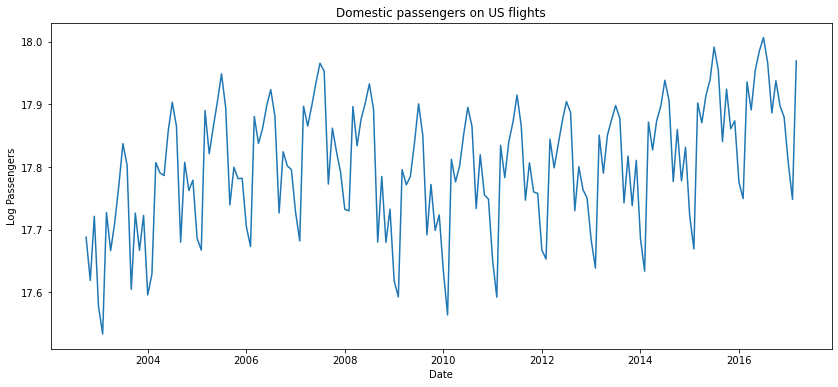

In [146]:
plt.figure(figsize=(14,6))
plt.plot(df_dom_log)
plt.title('Domestic passengers on US flights')
plt.xlabel('Date')
plt.ylabel('Log Passengers')

In [148]:
df_dom_log_rol_mean=df_dom_log.rolling(12).mean()
df_dom_log_rol_std=df_dom_log.rolling(12).std()

In [149]:
df_dom_log_rol_mean.dropna(inplace=True)
df_dom_log_rol_std.dropna(inplace=True)

Text(0, 0.5, 'Passengers')

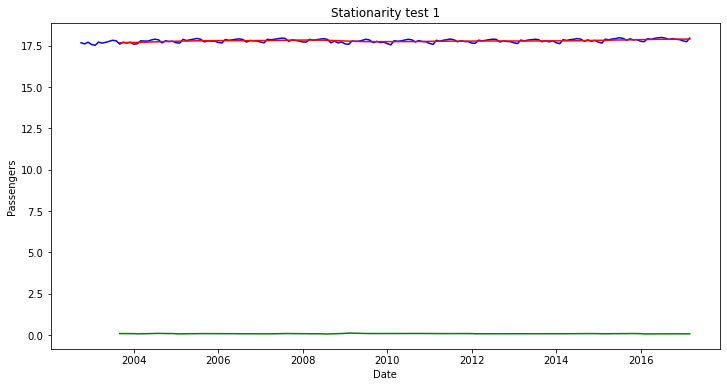

In [150]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_log,color='blue',label='Original')
plt.plot(df_dom_log_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_log_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [151]:
adf_log_result=adfuller(df_dom_log)

In [152]:
print("p-value: ",adf_log_result[1])
print("Test statistic: ",adf_log_result[0])
print("Critical values: ",adf_log_result[4])

p-value:  0.2104303282433293
Test statistic:  -2.188541927342769
Critical values:  {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


Log + shift(1)

In [153]:
df_dom_log_shift=df_dom_log-df_dom_log.shift()
df_dom_log_shift.head()

,Passengers
Date,
2002-10-01,NaN
2002-11-01,-0.069015
2002-12-01,0.102361
2003-01-01,-0.143736
2003-02-01,-0.044323


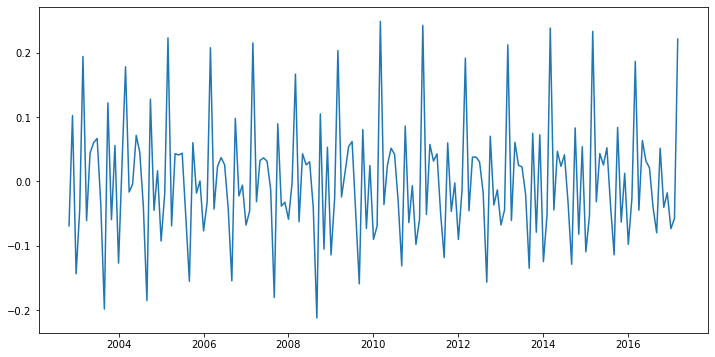

In [156]:
df_dom_log_shift.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(df_dom_log_shift)

In [157]:
df_dom_log_shift_rol_mean=df_dom_log_shift.rolling(12).mean()
df_dom_log_shift_rol_std=df_dom_log_shift.rolling(12).std()

df_dom_log_shift_rol_mean.dropna(inplace=True)
df_dom_log_shift_rol_std.dropna(inplace=True)

Text(0, 0.5, 'Passengers')

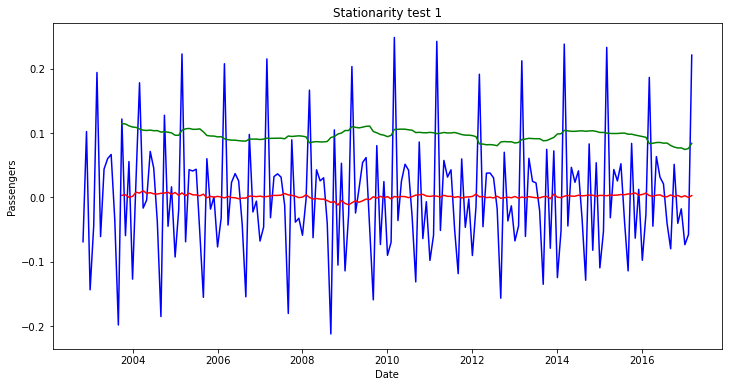

In [158]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_log_shift,color='blue',label='Original')
plt.plot(df_dom_log_shift_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_log_shift_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [159]:
adf_log_shift_result=adfuller(df_dom_log_shift)

In [160]:
print("p-value: ",adf_log_shift_result[1])
print("Test statistic: ",adf_log_shift_result[0])
print("Critical values: ",adf_log_shift_result[4])

p-value:  0.16333356212105826
Test statistic:  -2.3272380618044837
Critical values:  {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


Log + shift(12)

In [162]:
df_dom_log_seas_shift=df_dom_log-df_dom_log.shift(12)
df_dom_log_seas_shift.head(15)

,Passengers
Date,
2002-10-01,NaN
2002-11-01,NaN
2002-12-01,NaN
2003-01-01,NaN
2003-02-01,NaN
2003-03-01,NaN
2003-04-01,NaN
2003-05-01,NaN
2003-06-01,NaN


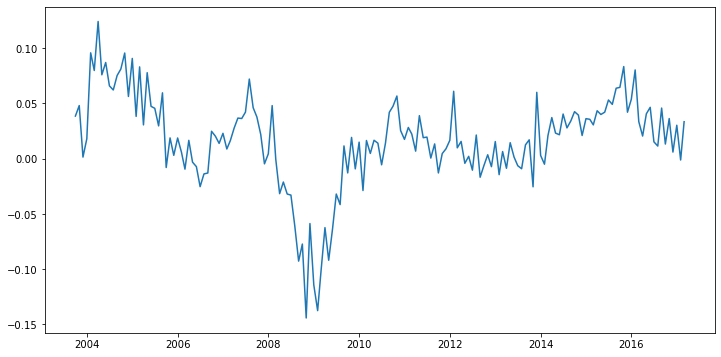

In [163]:
df_dom_log_seas_shift.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(df_dom_log_seas_shift)

In [164]:
df_dom_log_seas_shift_rol_mean=df_dom_log_seas_shift.rolling(12).mean()
df_dom_log_seas_shift_rol_std=df_dom_log_seas_shift.rolling(12).std()

df_dom_log_seas_shift_rol_mean.dropna(inplace=True)
df_dom_log_seas_shift_rol_std.dropna(inplace=True)

Text(0, 0.5, 'Passengers')

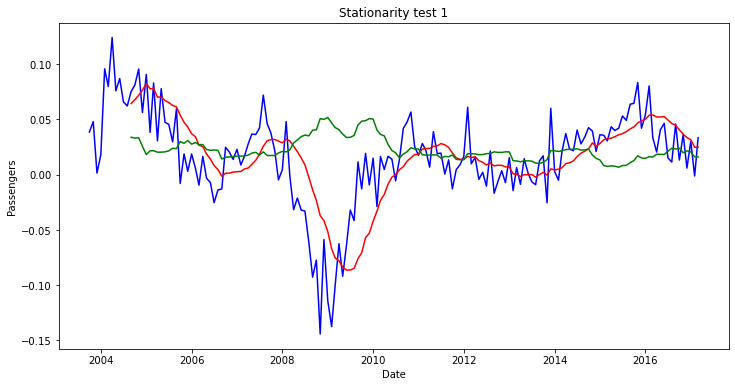

In [165]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_log_seas_shift,color='blue',label='Original')
plt.plot(df_dom_log_seas_shift_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_log_seas_shift_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [166]:
adf_log_seas_shift_result=adfuller(df_dom_log_seas_shift)
print("p-value: ",adf_log_seas_shift_result[1])
print("Test statistic: ",adf_log_seas_shift_result[0])
print("Critical values: ",adf_log_seas_shift_result[4])

p-value:  0.015066135057711991
Test statistic:  -3.2958249254996863
Critical values:  {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}


Shift(2)

In [167]:
df_dom_shift2=df_dom-df_dom.shift(2)

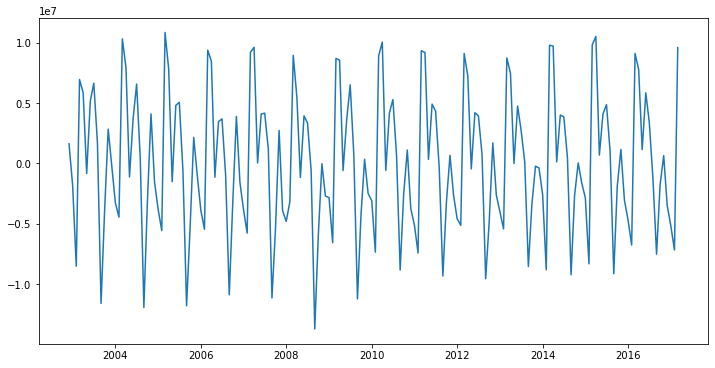

In [169]:
df_dom_shift2.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(df_dom_shift2)

In [170]:
df_dom_shift2_rol_mean=df_dom_shift2.rolling(12).mean()
df_dom_shift2_rol_std=df_dom_shift2.rolling(12).std()

df_dom_shift2_rol_mean.dropna(inplace=True)
df_dom_shift2_rol_std.dropna(inplace=True)

Text(0, 0.5, 'Passengers')

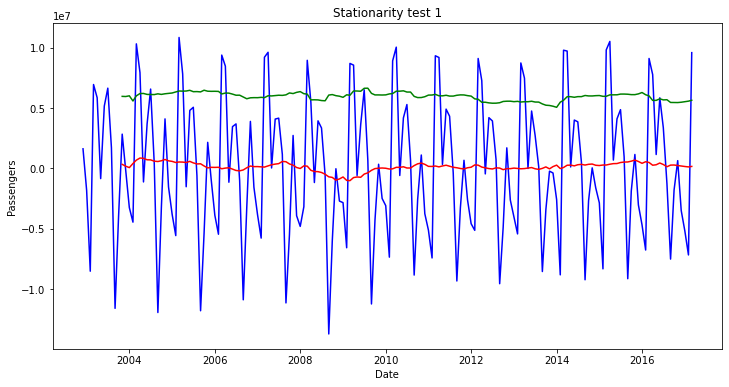

In [171]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_shift2,color='blue',label='Original')
plt.plot(df_dom_shift2_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_shift2_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [172]:
adf_shift2_result=adfuller(df_dom_shift2)
print("p-value: ",adf_shift2_result[1])
print("Test statistic: ",adf_shift2_result[0])
print("Critical values: ",adf_shift2_result[4])

p-value:  0.17249449091540836
Test statistic:  -2.298369155218831
Critical values:  {'1%': -3.4718957209472654, '5%': -2.8797795410156253, '10%': -2.5764947265625}


Original - Moving avg.

In [205]:
df_dom_rm_diff=df_dom-df_dom_rol_mean

In [207]:
df_dom_rm_diff.head(15)

,Passengers
Date,
2002-10-01,NaN
2002-11-01,NaN
2002-12-01,NaN
2003-01-01,NaN
2003-02-01,NaN
2003-03-01,NaN
2003-04-01,NaN
2003-05-01,NaN
2003-06-01,NaN


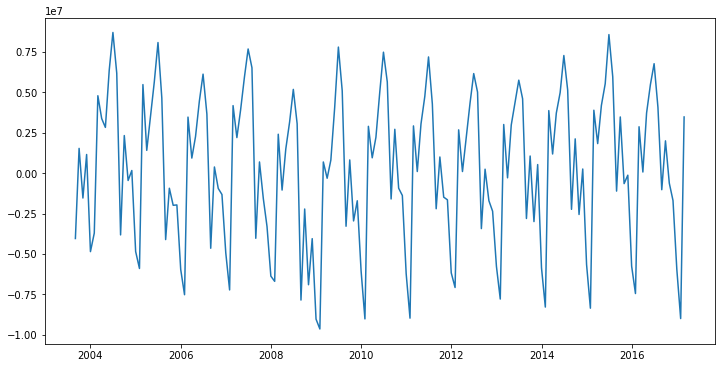

In [208]:
df_dom_rm_diff.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(df_dom_rm_diff)

In [209]:
df_dom_rm_rol_mean=df_dom_rm_diff.rolling(12).mean()
df_dom_rm_rol_std=df_dom_rm_diff.rolling(12).std()

df_dom_rm_rol_mean.dropna(inplace=True)
df_dom_rm_rol_std.dropna(inplace=True)

Text(0, 0.5, 'Passengers')

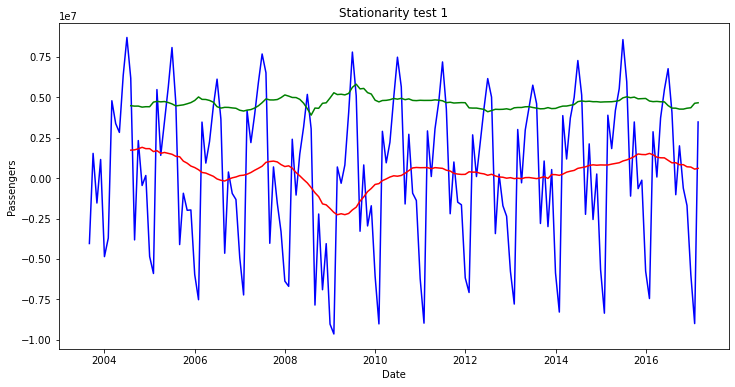

In [210]:
plt.figure(figsize=(12,6))
plt.plot(df_dom_rm_diff,color='blue',label='Original')
plt.plot(df_dom_rm_rol_mean,color='red',label='Rolling mean')
plt.plot(df_dom_rm_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test 1')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [211]:
adf_rm_result=adfuller(df_dom_rm_diff)
print("p-value: ",adf_rm_result[1])
print("Test statistic: ",adf_rm_result[0])
print("Critical values: ",adf_rm_result[4])

p-value:  0.009159897309866225
Test statistic:  -3.457092635373365
Critical values:  {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}


STATIONARY!

In [226]:
df_dom_rm_decompose=seasonal_decompose(df_dom_rm_diff)

In [227]:
res=df_dom_rm_decompose.resid

In [228]:
res.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

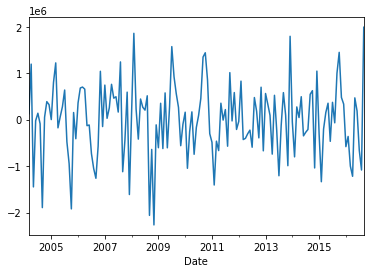

In [229]:
res.plot()

In [230]:
res_rol_mean=res.rolling(12).mean()
res_rol_std=res.rolling(12).std()

res_rol_mean.dropna(inplace=True)
res_rol_std.dropna(inplace=True)

Text(0, 0.5, 'Passengers')

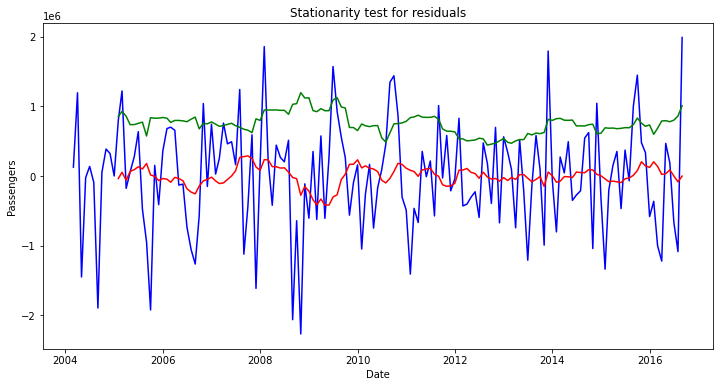

In [232]:
plt.figure(figsize=(12,6))
plt.plot(res,color='blue',label='Original')
plt.plot(res_rol_mean,color='red',label='Rolling mean')
plt.plot(res_rol_std,color='green',label='Rolling std')
plt.title('Stationarity test for residuals')
plt.xlabel('Date')
plt.ylabel('Passengers')

In [233]:
adf_res_result=adfuller(res)
print("p-value: ",adf_res_result[1])
print("Test statistic: ",adf_res_result[0])
print("Critical values: ",adf_res_result[4])

p-value:  0.00018185275281958077
Test statistic:  -4.5187543233296195
Critical values:  {'1%': -3.4782936965183815, '5%': -2.882567574015525, '10%': -2.5779830117488745}


ACF & PACF

In [248]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

opt. 8

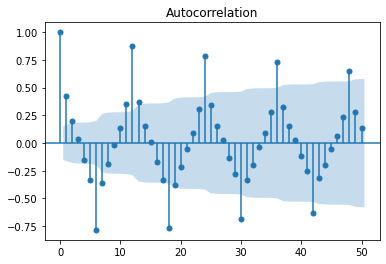

In [268]:
df_dom_stationary_acf=plot_acf(df_dom_rm_diff,lags=50)

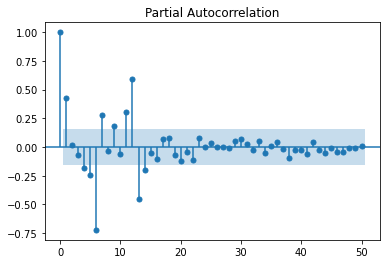

In [269]:
df_dom_stationary_pacf=plot_pacf(df_dom_rm_diff,method='ywm',lags=50)

opt. 3

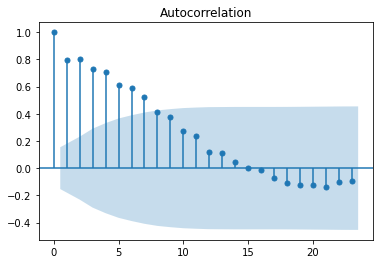

In [262]:
df_dom_seas_shift_acf=plot_acf(df_dom_seas_shift)

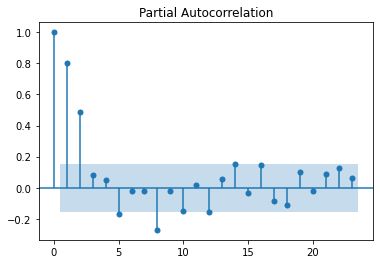

In [261]:
df_dom_seas_shift_pacf=plot_pacf(df_dom_seas_shift)

=> ACF reduces gradually while PACF sharply drops- indicates that opt. 3 is likely an AR process.
p=2(, q= 7)

opt. 6

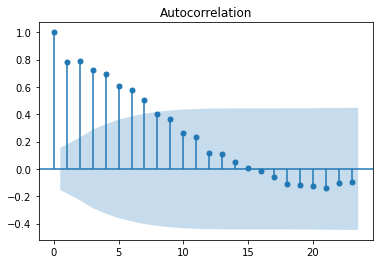

In [259]:
df_dom_log_seas_shift_acf=plot_acf(df_dom_log_seas_shift)

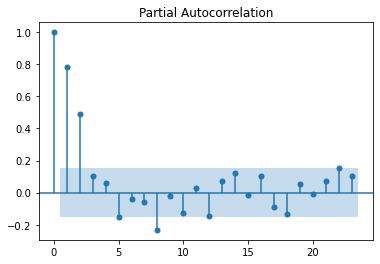

In [260]:
df_dom_log_seas_shift_pacf=plot_pacf(df_dom_log_seas_shift)

ARIMA model

In [290]:
from statsmodels.tsa.arima.model import ARIMA

opt. 3

In [336]:
model3a=ARIMA(df_dom_seas_shift,order=(2,1,0))
model3a_fit=model3a.fit()

C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [337]:
model3a_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  162
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2482.588
Date:                Sun, 19 Sep 2021   AIC                           4971.177
Time:                        14:03:33   BIC                           4980.421
Sample:                    10-01-2003   HQIC                          4974.930
                         - 03-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5792      0.075     -7.762      0.000      -0.725      -0.433
ar.L2         -0.1067      0.071     -1.511      0.131      -0.245       0.032
sigma2      1.437e+12   5.58e-15   2.57e+26      0.000    1.44e+12    1.44e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.85   Prob(JB):                         0.37
Heteroskedasticity (H):               0.59   Skew:                             0.26
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.81e+42. Standard errors may be unstable.
"""

In [306]:
model3b=ARIMA(df_dom_seas_shift,order=(1,1,0))
model3b_fit=model3b.fit()

C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [307]:
model3b_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  162
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2483.502
Date:                Sun, 19 Sep 2021   AIC                           4971.003
Time:                        13:53:53   BIC                           4977.166
Sample:                    10-01-2003   HQIC                          4973.505
                         - 03-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5232      0.064     -8.216      0.000      -0.648      -0.398
sigma2      1.464e+12   7.29e-16   2.01e+27      0.000    1.46e+12    1.46e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 2.13
Prob(Q):                              0.42   Prob(JB):                         0.35
Heteroskedasticity (H):               0.65   Skew:                             0.26
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+44. Standard errors may be unstable.
"""

Lower AIC is better. Moreover, for model3a, ar.L2 is insignificant (p>0.05). So we choose p=1.

In [365]:
print('RSS: ',sum((model3b_fit.fittedvalues-df_dom_seas_shift['Passengers'])**2))

RSS:  239483634794182.8


In [332]:
model3c=ARIMA(df_dom_seas_shift,order=(0,1,7))
model3c_fit=model3c.fit()

C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [333]:
model3c_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  162
Model:                 ARIMA(0, 1, 7)   Log Likelihood               -2475.475
Date:                Sun, 19 Sep 2021   AIC                           4966.949
Time:                        14:01:52   BIC                           4991.600
Sample:                    10-01-2003   HQIC                          4976.959
                         - 03-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5555      0.071     -7.781      0.000      -0.695      -0.416
ma.L2          0.1694      0.087      1.958      0.050      -0.000       0.339
ma.L3         -0.0515      0.081     -0.634      0.526      -0.211       0.108
ma.L4          0.1963      0.080      2.444      0.015       0.039       0.354
ma.L5         -0.2320      0.088     -2.645      0.008      -0.404      -0.060
ma.L6          0.4179      0.092      4.531      0.000       0.237       0.599
ma.L7         -0.1335      0.077     -1.729      0.084      -0.285       0.018
sigma2      1.324e+12   1.93e-14   6.84e+25      0.000    1.32e+12    1.32e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.86   Prob(JB):                         0.50
Heteroskedasticity (H):               0.59   Skew:                             0.22
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+42. Standard errors may be unstable.
"""

In [334]:
model3d=ARIMA(df_dom_seas_shift,order=(0,1,8))
model3d_fit=model3d.fit()

C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [335]:
model3d_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  162
Model:                 ARIMA(0, 1, 8)   Log Likelihood               -2475.382
Date:                Sun, 19 Sep 2021   AIC                           4968.764
Time:                        14:02:14   BIC                           4996.497
Sample:                    10-01-2003   HQIC                          4980.025
                         - 03-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5580      0.074     -7.569      0.000      -0.702      -0.413
ma.L2          0.1852      0.089      2.074      0.038       0.010       0.360
ma.L3         -0.0577      0.080     -0.718      0.473      -0.215       0.100
ma.L4          0.2055      0.080      2.580      0.010       0.049       0.362
ma.L5         -0.2441      0.088     -2.776      0.005      -0.416      -0.072
ma.L6          0.4243      0.092      4.598      0.000       0.243       0.605
ma.L7         -0.1553      0.090     -1.727      0.084      -0.332       0.021
ma.L8          0.0390      0.083      0.472      0.637      -0.123       0.201
sigma2       1.31e+12   2.87e-14   4.56e+25      0.000    1.31e+12    1.31e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.89   Prob(JB):                         0.50
Heteroskedasticity (H):               0.59   Skew:                             0.23
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.24e+41. Standard errors may be unstable.
"""

q=7 gives the lower AIC

In [339]:
model3=ARIMA(df_dom_seas_shift,order=(1,1,7))
model_fit3=model3.fit()

C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [340]:
model_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  162
Model:                 ARIMA(1, 1, 7)   Log Likelihood               -2475.499
Date:                Sun, 19 Sep 2021   AIC                           4968.999
Time:                        14:04:36   BIC                           4996.732
Sample:                    10-01-2003   HQIC                          4980.260
                         - 03-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2385      0.556     -0.429      0.668      -1.328       0.851
ma.L1         -0.3204      0.545     -0.587      0.557      -1.389       0.748
ma.L2          0.0505      0.299      0.169      0.866      -0.536       0.637
ma.L3         -0.0169      0.115     -0.147      0.883      -0.243       0.209
ma.L4          0.1942      0.070      2.779      0.005       0.057       0.331
ma.L5         -0.1956      0.128     -1.525      0.127      -0.447       0.056
ma.L6          0.3694      0.148      2.503      0.012       0.080       0.659
ma.L7         -0.0537      0.218     -0.246      0.806      -0.482       0.374
sigma2       1.25e+12   7.79e-14    1.6e+25      0.000    1.25e+12    1.25e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.89   Prob(JB):                         0.50
Heteroskedasticity (H):               0.59   Skew:                             0.23
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.11e+41. Standard errors may be unstable.
"""

In [341]:
df_dom_seas_shift.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2003-10-01 to 2017-03-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  162 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


Auto ARIMA

In [272]:
!pip install -q pmdarima

In [273]:
from pmdarima.arima import auto_arima

opt. 3

In [280]:
seas_shift_auto = auto_arima(df_dom_seas_shift,seasonal=False,test='kpss',trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5002.860, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5219.613, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5039.302, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5159.031, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5000.611, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5120.319, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5006.181, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5002.305, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5096.887, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5000.281, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4999.006, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5000.343, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5002.281, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4999.630, Time=0.07 sec

Best model:  ARIMA(2,0,0)(0,0,0)

In [281]:
seas_shift_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  162
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2496.503
Date:                Sun, 19 Sep 2021   AIC                           4999.006
Time:                        13:22:07   BIC                           5008.269
Sample:                             0   HQIC                          5002.767
                                - 162                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4238      0.065      6.550      0.000       0.297       0.551
ar.L2          0.4811      0.070      6.918      0.000       0.345       0.617
sigma2      1.418e+12   4.76e-15   2.98e+26      0.000    1.42e+12    1.42e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.65   Prob(JB):                         0.56
Heteroskedasticity (H):               0.73   Skew:                             0.11
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.09e+42. Standard errors may be unstable.
"""

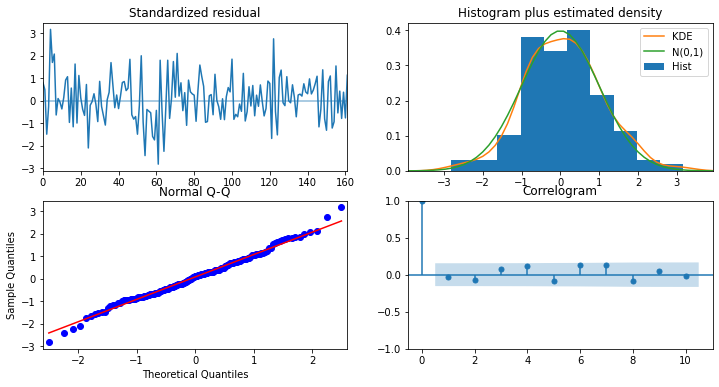

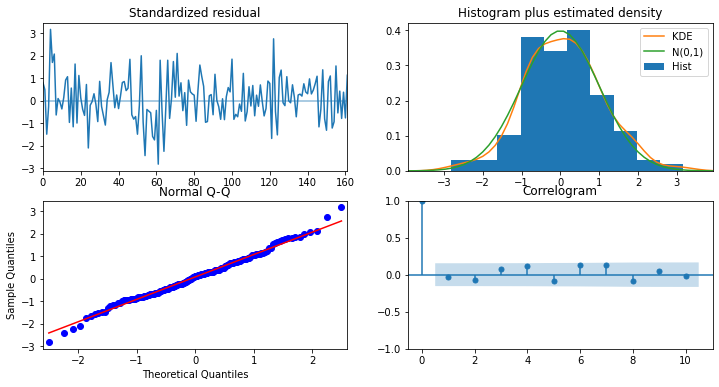

In [287]:
seas_shift_auto.plot_diagnostics(figsize=(12,6))

Re-build model as recommended above (ARIMA(2,0,0))

In [385]:
train_data=df_dom_seas_shift[:121]
test_data=df_dom_seas_shift[121:]

In [386]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2003-10-01 to 2013-10-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2013-11-01 to 2017-03-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [387]:
model3_auto=ARIMA(train_data, order=(2,0,0))

C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [388]:
model3_auto_fit=model3_auto.fit()

In [389]:
model3_auto_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  121
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1866.159
Date:                Sun, 19 Sep 2021   AIC                           3740.318
Time:                        14:50:40   BIC                           3751.502
Sample:                    10-01-2003   HQIC                          3744.860
                         - 10-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.346e+05   1.96e-10   2.73e+15      0.000    5.35e+05    5.35e+05
ar.L1          0.4364      0.076      5.708      0.000       0.287       0.586
ar.L2          0.4593      0.083      5.520      0.000       0.296       0.622
sigma2      1.457e+12   1.31e-14   1.12e+26      0.000    1.46e+12    1.46e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.72   Prob(JB):                         0.49
Heteroskedasticity (H):               0.52   Skew:                             0.12
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.97e+42. Standard errors may be unstable.
"""

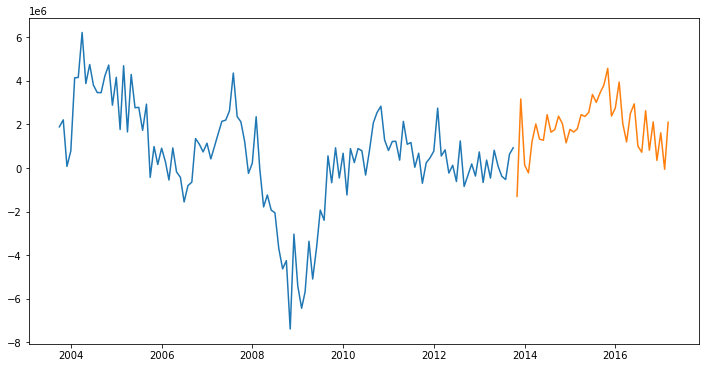

In [390]:
plt.figure(figsize=(12,6))
plt.plot(train_data)
plt.plot(test_data)

In [404]:
model3_auto_pred=df_dom_seas_shift.copy()
model3_auto_pred['Prediction']=model3_auto_fit.predict(start=121,end=161)

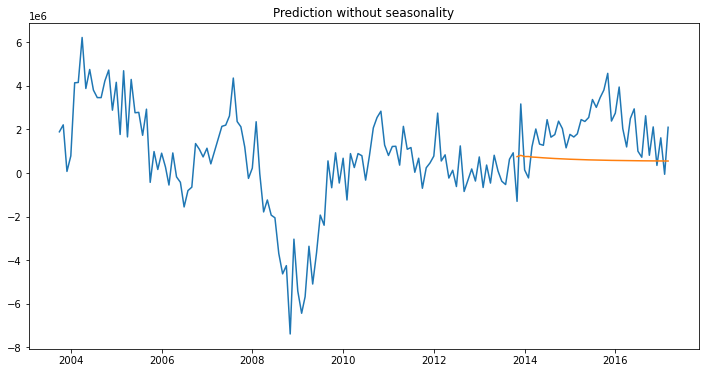

In [405]:
plt.figure(figsize=(12,6))
plt.title('Prediction without seasonality')
plt.plot(model3_auto_pred)

Auto (S)ARIMA

In [403]:
seas_shift_auto_seasonal = auto_arima(df_dom_seas_shift,seasonal=True,test='kpss',trace=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=4978.016, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5197.559, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=5031.069, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5144.015, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5219.613, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=4979.127, Time=0.28 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=4994.797, Time=0.25 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=4976.224, Time=0.68 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=4982.702, Time=0.40 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=4976.662, Time=0.79 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=4977.595, Time=0.59 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=4977.143, Time=0.43 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=4978.214, Time=0.54 sec
 ARIMA(3,0,2)(2,0,1)[12] intercept   : AIC=4977.254, Time=0.68 sec
 ARIMA(2,0,3)(2,0,1

In [406]:
seas_shift_auto_seasonal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  162
Model:             SARIMAX(2, 0, 2)x(2, 0, [1], 12)   Log Likelihood               -2479.938
Date:                              Sun, 19 Sep 2021   AIC                           4975.876
Time:                                      17:16:54   BIC                           5000.577
Sample:                                           0   HQIC                          4985.905
                                              - 162                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2866      0.286      1.004      0.315      -0.273       0.846
ar.L2          0.6814      0.284      2.396      0.017       0.124       1.239
ma.L1          0.1696      0.318      0.533      0.594      -0.454       0.793
ma.L2         -0.1554      0.171     -0.910      0.363      -0.490       0.179
ar.S.L12       0.1009      0.197      0.513      0.608      -0.285       0.486
ar.S.L24      -0.2245      0.135     -1.659      0.097      -0.490       0.041
ma.S.L12      -0.5818      0.190     -3.059      0.002      -0.955      -0.209
sigma2       1.28e+12   3.39e-13   3.78e+24      0.000    1.28e+12    1.28e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.92   Prob(JB):                         0.26
Heteroskedasticity (H):               0.60   Skew:                             0.08
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.15e+40. Standard errors may be unstable.
"""

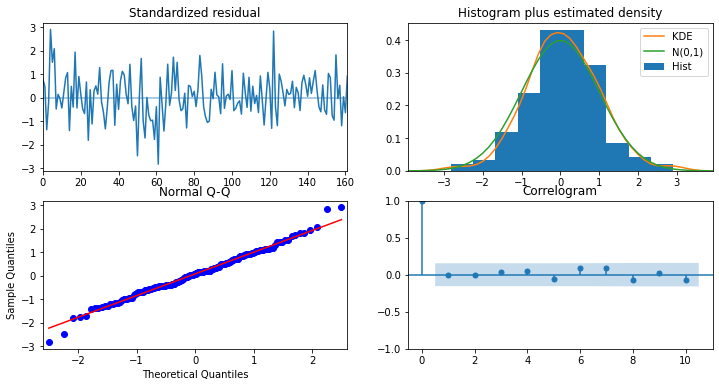

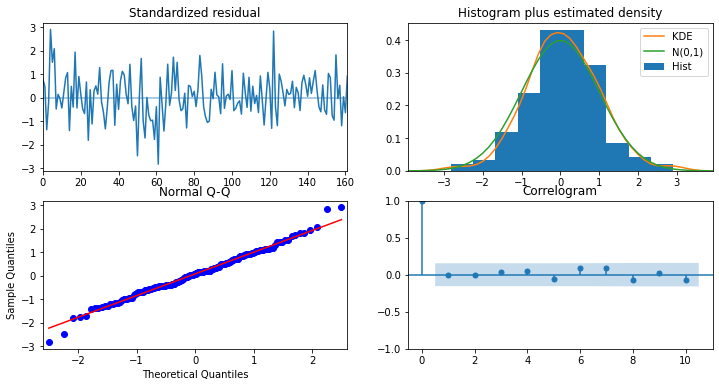

In [407]:
seas_shift_auto_seasonal.plot_diagnostics(figsize=(12,6))

Re-build model as recommended above (SARIMAX(2,0,2),(2,0,1,12))

In [408]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [409]:
model3_auto_seasonal=SARIMAX(train_data, order=(2,0,2),seasonal_order=(2,0,1,12))

C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Test\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [410]:
model3_auto_seasonal_fit=model3_auto_seasonal.fit()

In [411]:
model3_auto_seasonal_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                  121
Model:             SARIMAX(2, 0, 2)x(2, 0, [1], 12)   Log Likelihood               -1855.051
Date:                              Sun, 19 Sep 2021   AIC                           3726.101
Time:                                      17:23:39   BIC                           3748.468
Sample:                                  10-01-2003   HQIC                          3735.185
                                       - 10-01-2013                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2437      0.273      0.892      0.372      -0.292       0.779
ar.L2          0.6947      0.266      2.608      0.009       0.173       1.217
ma.L1          0.2655      0.320      0.829      0.407      -0.362       0.893
ma.L2         -0.1021      0.151     -0.678      0.498      -0.397       0.193
ar.S.L12       0.1741      0.250      0.697      0.486      -0.316       0.664
ar.S.L24      -0.1099      0.165     -0.665      0.506      -0.434       0.214
ma.S.L12      -0.6704      0.243     -2.753      0.006      -1.148      -0.193
sigma2      1.284e+12   6.78e-14   1.89e+25      0.000    1.28e+12    1.28e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.98   Prob(JB):                         0.44
Heteroskedasticity (H):               0.49   Skew:                             0.05
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.62e+42. Standard errors may be unstable.
"""

In [413]:
model3_auto_pred.tail()

,Passengers,Prediction
Date,,
2016-11-01,2114716.0,554364.848119
2016-12-01,348219.0,552986.841241
2017-01-01,1613765.0,551705.057182
2017-02-01,-59463.0,550512.776939
2017-03-01,2097735.0,549403.750684


In [414]:
model3_auto_pred['Seasonal Prediction']=model3_auto_seasonal_fit.predict(start=121,end=161)

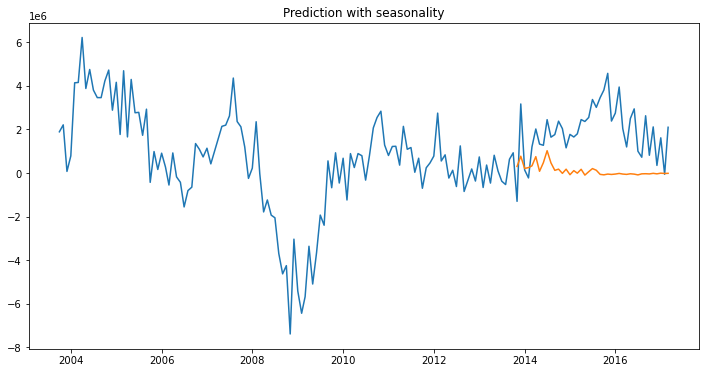

In [417]:
plt.figure(figsize=(12,6))
plt.title('Prediction with seasonality')
plt.plot(model3_auto_pred[['Passengers','Seasonal Prediction']])

Prediction (well) below par! HERE
Can replicate same analysis for opt. 6 below, or investigate why this prediction failed.

opt. 6

In [282]:
log_seas_shift_auto = auto_arima(df_dom_log_seas_shift,seasonal=False,test='kpss',trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-749.461, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-542.086, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-710.988, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-613.119, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-751.732, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-664.289, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-745.750, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-749.733, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-689.127, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-751.487, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-748.501, Time=0.60 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-751.079, Time=0.64 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 3.156 seconds


In [283]:
log_seas_shift_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  162
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 379.866
Date:                Sun, 19 Sep 2021   AIC                           -751.732
Time:                        13:24:33   BIC                           -739.381
Sample:                             0   HQIC                          -746.717
                                - 162                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9386      0.029     32.757      0.000       0.882       0.995
ma.L1         -0.5781      0.082     -7.056      0.000      -0.739      -0.418
ma.L2          0.2116      0.073      2.881      0.004       0.068       0.356
sigma2         0.0005   5.19e-05     10.269      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.09
Prob(Q):                              0.97   Prob(JB):                         0.13
Heteroskedasticity (H):               0.55   Skew:                             0.16
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

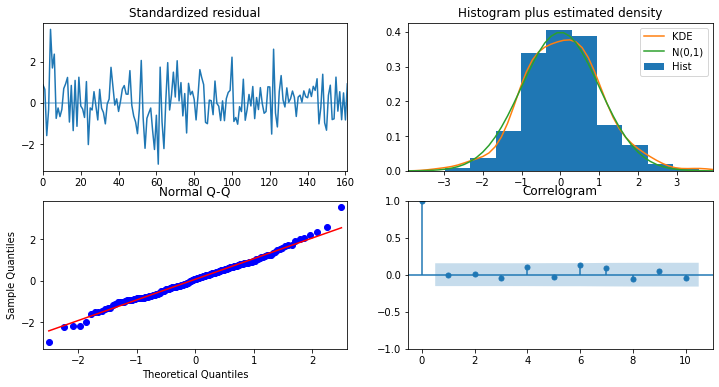

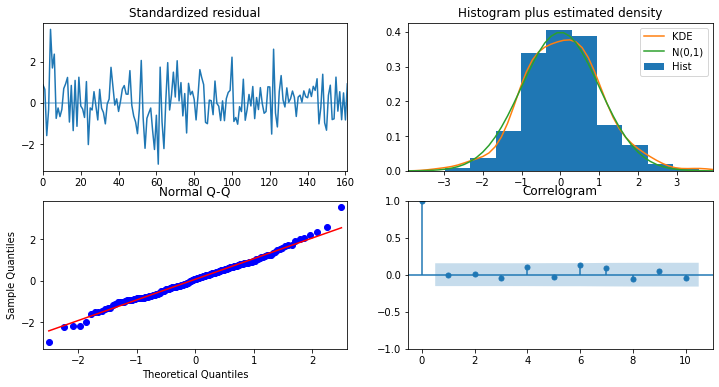

In [286]:
log_seas_shift_auto.plot_diagnostics(figsize=(12,6))